In [3]:
from fastai.vision import *

In [7]:
folder = 'sealion'
file = 'urls_sealion.csv'

In [8]:
folder = 'seal'
file = 'urls_seal.csv'

In [9]:
folder = 'otter'
file = 'urls_otter.csv'

In [10]:
path = Path('data/sea_animals')
dest = path/folder
dest.mkdir(parents=True, exist_ok=True)

In [11]:
path.ls()

[PosixPath('data/sea_animals/sealion'),
 PosixPath('data/sea_animals/seal'),
 PosixPath('data/sea_animals/otter'),
 PosixPath('data/sea_animals/.ipynb_checkpoints'),
 PosixPath('data/sea_animals/urls_sealion.csv'),
 PosixPath('data/sea_animals/urls_seal.csv'),
 PosixPath('data/sea_animals/urls_otter.csv'),
 PosixPath('data/sea_animals/models'),
 PosixPath('data/sea_animals/cleaned.csv'),
 PosixPath('data/sea_animals/export.pkl'),
 PosixPath('data/sea_animals/Sea-Lion.jpg')]

In [34]:
classes = ['sealion','seal','otter']

In [9]:
download_images(path/file, dest, max_pics=200)

Error  Invalid URL '': No schema supplied. Perhaps you meant http://?
Error  Invalid URL '': No schema supplied. Perhaps you meant http://?
Error  Invalid URL '': No schema supplied. Perhaps you meant http://?
Error  Invalid URL '': No schema supplied. Perhaps you meant http://?
Error  Invalid URL '': No schema supplied. Perhaps you meant http://?
Error  Invalid URL '': No schema supplied. Perhaps you meant http://?
Error  Invalid URL '': No schema supplied. Perhaps you meant http://?
Error  Invalid URL '': No schema supplied. Perhaps you meant http://?
Error  Invalid URL '': No schema supplied. Perhaps you meant http://?
Error  Invalid URL '': No schema supplied. Perhaps you meant http://?
Error  Invalid URL '': No schema supplied. Perhaps you meant http://?
Error  Invalid URL '': No schema supplied. Perhaps you meant http://?
Error  Invalid URL '': No schema supplied. Perhaps you meant http://?
Error  Invalid URL '': No schema supplied. Perhaps you meant http://?
Error  Invalid URL '

In [32]:
download_images(path/file, dest, max_pics=300, max_workers=0)

Error  Invalid URL '': No schema supplied. Perhaps you meant http://?
Error  Invalid URL '': No schema supplied. Perhaps you meant http://?
Error  Invalid URL '': No schema supplied. Perhaps you meant http://?
Error  Invalid URL '': No schema supplied. Perhaps you meant http://?
Error  Invalid URL '': No schema supplied. Perhaps you meant http://?
Error  Invalid URL '': No schema supplied. Perhaps you meant http://?
Error  Invalid URL '': No schema supplied. Perhaps you meant http://?
Error  Invalid URL '': No schema supplied. Perhaps you meant http://?
Error  Invalid URL '': No schema supplied. Perhaps you meant http://?
Error  Invalid URL '': No schema supplied. Perhaps you meant http://?
Error  Invalid URL '': No schema supplied. Perhaps you meant http://?
Error  Invalid URL '': No schema supplied. Perhaps you meant http://?
Error  Invalid URL '': No schema supplied. Perhaps you meant http://?
Error  Invalid URL '': No schema supplied. Perhaps you meant http://?
Error  Invalid URL '

In [35]:
for c in classes:
    print(c)
    verify_images(path/c, delete=True, max_size=500)

sealion


seal


otter


In [43]:
np.random.seed(42)
data=ImageDataBunch.from_folder(path, train=".", valid_pct=0.2, ds_tfms=get_transforms(),
                                size=224, num_workers=4).normalize(imagenet_stats)


In [44]:
data.classes


['otter', 'seal', 'sealion']

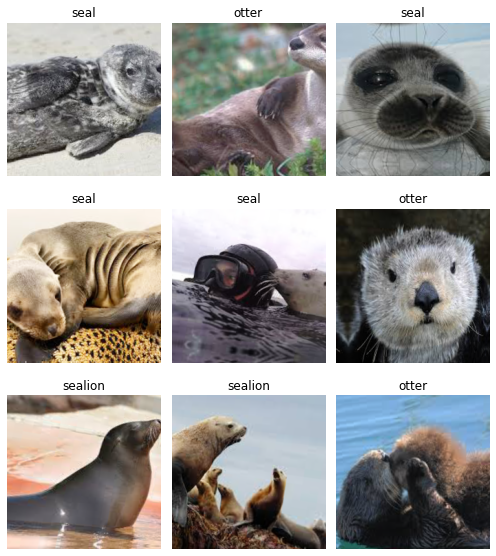

In [45]:
data.show_batch(rows=3, figsize=(7,8))

In [46]:
data.classes, data.c, len(data.train_ds), len(data.valid_ds)


(['otter', 'seal', 'sealion'], 3, 576, 144)

In [47]:
learn = cnn_learner(data, models.resnet34, metrics=error_rate)

In [48]:
learn.fit_one_cycle(4)

epoch,train_loss,valid_loss,error_rate,time
0,1.268904,0.865765,0.236111,00:07
1,0.959620,0.712084,0.152778,00:07
2,0.777730,0.608643,0.152778,00:07
3,0.646488,0.579758,0.152778,00:07


In [49]:
learn.save('stage-1')

In [66]:
learn.unfreeze()

In [51]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


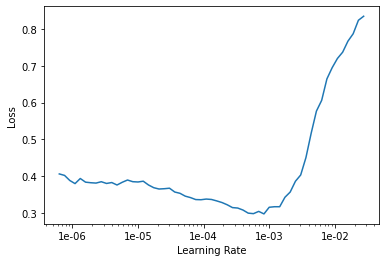

In [52]:
learn.recorder.plot()

In [71]:
learn.fit_one_cycle(2, max_lr=slice(1e-4,2e-3))

epoch,train_loss,valid_loss,error_rate,time
0,0.033923,0.748396,0.194444,00:07
1,0.039516,0.902245,0.152778,00:07


In [72]:
learn.save('stage-2')

In [5]:
learn.load('stage-2');


NameError: name 'learn' is not defined

In [74]:
interp = ClassificationInterpretation.from_learner(learn)

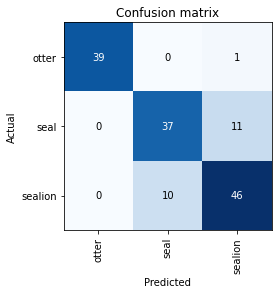

In [75]:
interp.plot_confusion_matrix()

In [76]:
from fastai.widgets import *

In [2]:
db = (ImageList.from_folder(path)
                   .split_none()
                   .label_from_folder()
                   .transform(get_transforms(), size=224)
                   .databunch()
     )

NameError: name 'ImageList' is not defined

In [83]:
learn_cln = cnn_learner(db, models.resnet34, metrics=error_rate)

learn_cln.load('stage-2');

In [84]:
ds, idxs = DatasetFormatter().from_toplosses(learn_cln)

In [80]:
ImageCleaner(ds, idxs, path)

Button(button_style='primary', description='Next Batch', layout=Layout(width='auto'), style=ButtonStyle())

In [12]:
db = (ImageList.from_csv(path, 'cleaned.csv', folder='.')
                    .split_none()
                    .label_from_df()
                    .transform(get_transforms(), size=224)
                    .databunch()
      )
ds, idxs = DatasetFormatter().from_similars(learn_cln)

NameError: name 'DatasetFormatter' is not defined

In [88]:
ImageCleaner(ds, idxs, path, duplicates=True)

Button(button_style='primary', description='Next Batch', layout=Layout(width='auto'), style=ButtonStyle())

In [13]:
db = (ImageList.from_csv(path, 'cleaned.csv', folder='.')
                    .split_by_rand_pct(0.2)
                    .label_from_df()
                    .transform(get_transforms(), size=224)
                    .databunch()
      )
learn_cln = cnn_learner(db, models.resnet34, metrics=error_rate)

learn_cln.load('stage-2');

In [14]:
learn_cln.fit_one_cycle(2, max_lr=slice(1e-4,2e-3))

epoch,train_loss,valid_loss,error_rate,time
0,0.142918,0.308673,0.107143,00:07
1,0.132272,0.163813,0.064286,00:05


In [15]:
learn_cln.save('stage-3')

In [16]:
learn_cln.load('stage-3');

In [17]:
interp = ClassificationInterpretation.from_learner(learn_cln)

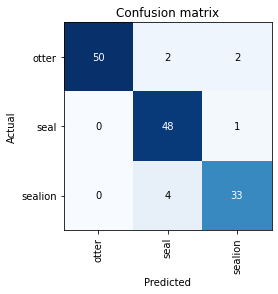

In [18]:
interp.plot_confusion_matrix()

In [19]:
learn_cln.export()

In [20]:
defaults.device = torch.device('cpu')

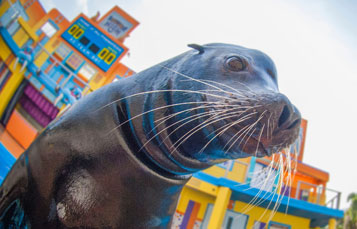

In [21]:
img = open_image(path/'Sea-Lion.jpg')
img

In [22]:
path

PosixPath('data/sea_animals')

In [23]:
learn = load_learner(path)

In [24]:
pred_class,pred_idx,outputs = learn.predict(img)
pred_class

Category sealion

In [107]:
@app.route("/classify-url", methods=["GET"])
async def classify_url(request):
    bytes = await get_bytes(request.query_params["url"])
    img = open_image(BytesIO(bytes))
    _,_,losses = learner.predict(img)
    return JSONResponse({
        "predictions": sorted(
            zip(cat_learner.data.classes, map(float, losses)),
            key=lambda p: p[1],
            reverse=True
        )
    })

NameError: name 'app' is not defined